In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px

from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import DBSCAN
from matplotlib import pyplot as plt
import seaborn as sns
sns.set()

%matplotlib inline

## Get Data

In [2]:
url = 'https://raw.githubusercontent.com/bdbritt/weather_flight_delays/main/weather_delay_data_cleaned.csv'
# df = pd.read_csv('weather_delay_data.csv').sample(frac = 0.30)
df = pd.read_csv(url)
print(f'Retrieved {df.shape[0]} records')

Retrieved 840029 records


In [3]:
# pad times with zeros
df['DEP_TIME'] = df['DEP_TIME'].astype(str).str.pad(4, fillchar='0')

# add weather even flag
df['weather_event'] = np.where(df['WEATHER_DELAY'] != 0, True, False)
df['nas_event'] = np.where(df['NAS_DELAY'] != 0, True, False)

In [4]:
wanted_cols = ['ORIGIN','WEATHER_DELAY', 'NAS_DELAY','month', 'year',
              'travel_season']
df = df[wanted_cols]

In [5]:
df.head()


,ORIGIN,WEATHER_DELAY,NAS_DELAY,month,year,travel_season
0,ORD,11.0,0.0,1,2018,low
1,ORD,26.0,0.0,1,2018,low
2,ORD,31.0,0.0,1,2018,low
3,ORD,75.0,0.0,1,2018,low
4,ORD,49.0,8.0,1,2018,low


In [6]:
#Create subsets of data by Origin and weather delay time greater than 0
origin_ORD = df[df["ORIGIN"].isin(["ORD"])]
origin_ORD = origin_ORD.loc[origin_ORD["WEATHER_DELAY"] > 0]
origin_ORD.tail()


origin_DEN = df[df["ORIGIN"].isin(["DEN"])]
origin_DEN = origin_DEN.loc[origin_DEN["WEATHER_DELAY"] > 0]

origin_LAX = df[df["ORIGIN"].isin(["LAX"])]
origin_LAX = origin_LAX.loc[origin_LAX["WEATHER_DELAY"] > 0]

origin_DFW = df[df["ORIGIN"].isin(["DFW"])]
origin_DFW = origin_DFW.loc[origin_DFW["WEATHER_DELAY"] > 0]

origin_ATL = df[df["ORIGIN"].isin(["ATL"])]
origin_ATL = origin_ATL.loc[origin_ATL["WEATHER_DELAY"] > 0]



## Plot Data

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or R

<AxesSubplot:title={'center':'ATL'}, xlabel='year', ylabel='WEATHER_DELAY'>

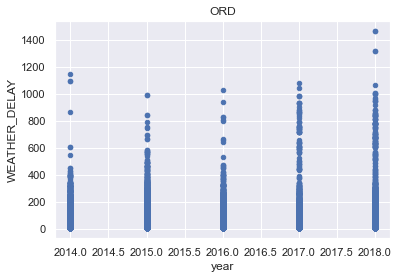

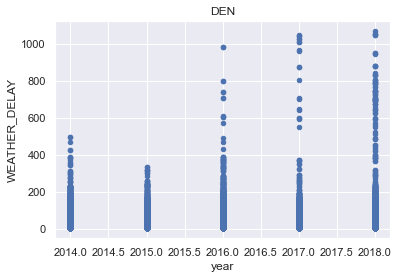

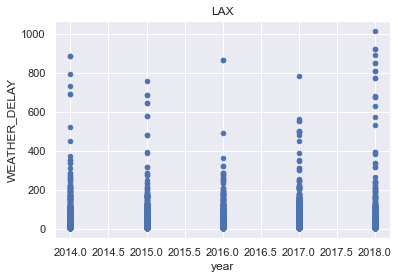

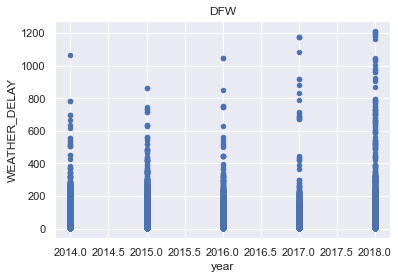

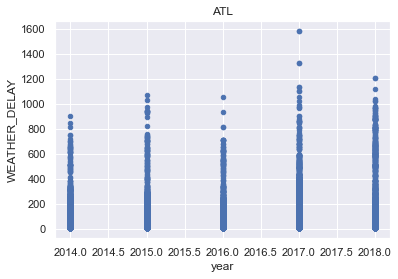

In [7]:
# For each origin, scatter plot year and weather delay

origin_ORD.plot.scatter(x = "year", y = "WEATHER_DELAY", title = "ORD")

origin_DEN.plot.scatter(x = "year", y = "WEATHER_DELAY", title = "DEN")

origin_LAX.plot.scatter(x = "year", y = "WEATHER_DELAY", title = "LAX")

origin_DFW.plot.scatter(x = "year", y = "WEATHER_DELAY", title = "DFW")

origin_ATL.plot.scatter(x = "year", y = "WEATHER_DELAY", title = "ATL")

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or R

<AxesSubplot:title={'center':'ATL'}, xlabel='month', ylabel='WEATHER_DELAY'>

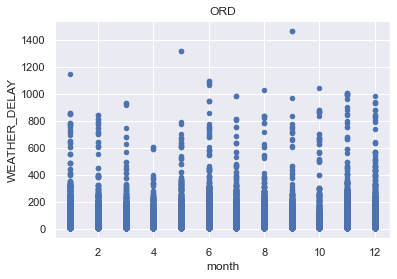

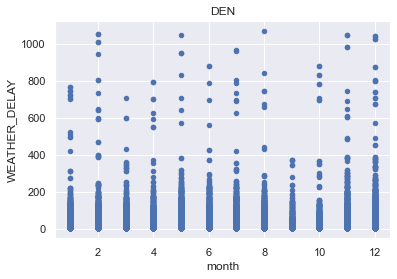

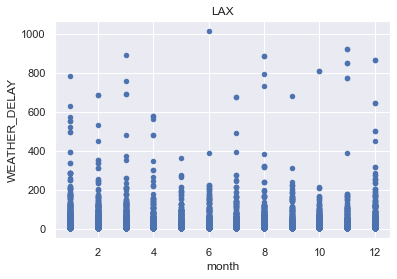

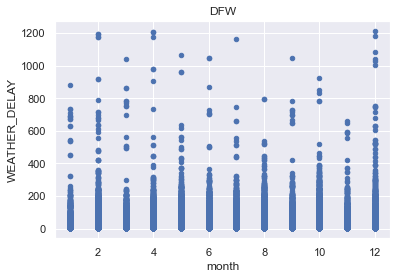

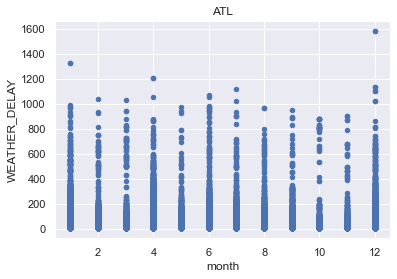

In [8]:
# For each origin, scatter plot month and weather delay

origin_ORD.plot.scatter(x = "month", y = "WEATHER_DELAY", title = "ORD")

origin_DEN.plot.scatter(x = "month", y = "WEATHER_DELAY", title = "DEN")

origin_LAX.plot.scatter(x = "month", y = "WEATHER_DELAY", title = "LAX")

origin_DFW.plot.scatter(x = "month", y = "WEATHER_DELAY", title = "DFW")

origin_ATL.plot.scatter(x = "month", y = "WEATHER_DELAY", title = "ATL")

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or R

<AxesSubplot:title={'center':'ATL'}, xlabel='travel_season', ylabel='WEATHER_DELAY'>

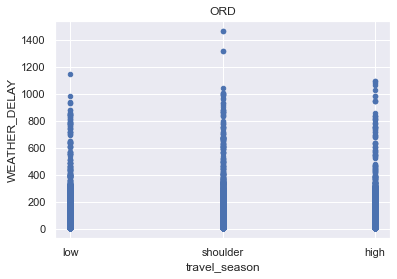

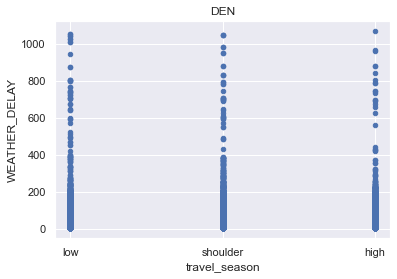

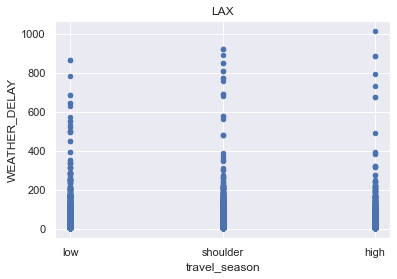

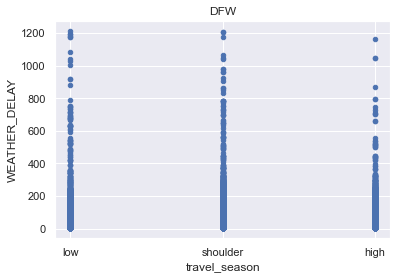

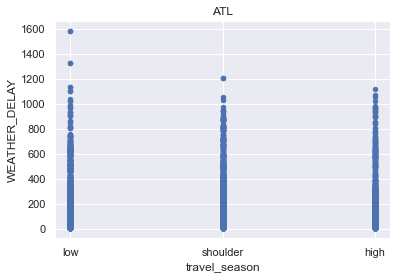

In [9]:
# For each origin, scatter plot travel season and weather delay
origin_ORD.plot.scatter(x = "travel_season", y = "WEATHER_DELAY", title = "ORD")

origin_DEN.plot.scatter(x = "travel_season", y = "WEATHER_DELAY", title = "DEN")

origin_LAX.plot.scatter(x = "travel_season", y = "WEATHER_DELAY", title = "LAX")

origin_DFW.plot.scatter(x = "travel_season", y = "WEATHER_DELAY", title = "DFW")

origin_ATL.plot.scatter(x = "travel_season", y = "WEATHER_DELAY", title = "ATL")

## WEATHER & MONTHS DBSCAN

### ORD

In [10]:
test_ord = origin_ORD.loc[origin_ORD['year']==2018].copy() #.sample(frac = 0.30)

X = test_ord.iloc[:,[1,3]].values
X.shape

(15547, 2)

In [60]:
neigh = NearestNeighbors(n_neighbors=2)
nbrs = neigh.fit(X)
distances, indices = nbrs.kneighbors(X)

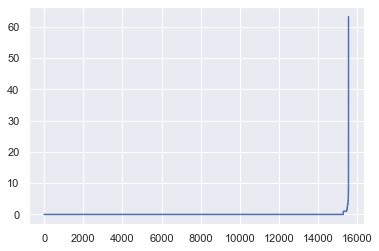

In [61]:
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)

In [62]:
m = DBSCAN(eps=5, min_samples=4)
m.fit(X)

DBSCAN(eps=5, min_samples=4)

In [63]:
clusters = m.labels_

In [64]:
colors = ['forestgreen', 'maroon', 'royalblue', 'mediumorchid', 'tan', 'deeppink', 'olive', 'goldenrod', 'lightcyan', 'black']
vectorizer = np.vectorize(lambda x: colors[x % len(colors)])
fig = px.scatter(X, X[:,1], X[:,0], color=vectorizer(clusters), labels = {"x": "Month", "y": "Weather Delay (min)"}, title = "ORD")
fig.update_layout(showlegend=False)
fig.update_layout(
    autosize=False,
    width=1000,
    height=1000,
    margin=dict(
        l=50,
        r=50,
        b=100,
        t=100,
        pad=4
    ),
)

fig.show()


In [65]:
np.unique(clusters)


array([-1,  0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

In [66]:
no_clusters = len(np.unique(clusters) )
no_noise = np.sum(np.array(clusters) == -1, axis=0)

print('Estimated no. of clusters: %d' % no_clusters)
print('Estimated no. of noise points: %d' % no_noise)

Estimated no. of clusters: 12
Estimated no. of noise points: 111


### DEN

In [18]:
test_den = origin_DEN.loc[origin_DEN['year']==2018].copy() #.sample(frac = 0.30)

Y = test_den.iloc[:,[1,3]].values
Y.shape

(3784, 2)

In [19]:
neigh = NearestNeighbors(n_neighbors=2)
nbrs = neigh.fit(Y)
distances, indices = nbrs.kneighbors(Y)


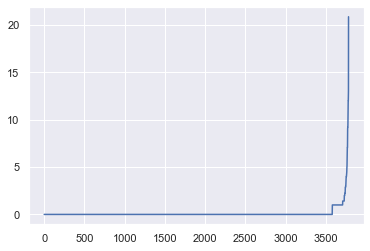

In [20]:
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)


In [21]:
m = DBSCAN(eps=6, min_samples=4)
m.fit(Y)


DBSCAN(eps=6, min_samples=4)

In [22]:
clusters = m.labels_


In [23]:
fig = px.scatter(Y, Y[:,1], Y[:,0], color=vectorizer(clusters), labels = {"x": "Month", "y": "Weather Delay (min)"}, title = "DEN")
fig.update_layout(showlegend=False)
fig.update_layout(
    autosize=False,
    width=1000,
    height=1000,
    margin=dict(
        l=50,
        r=50,
        b=100,
        t=100,
        pad=4
    ),
)

fig.show()


In [24]:
no_clusters = len(np.unique(clusters) )
no_noise = np.sum(np.array(clusters) == -1, axis=0)

print('Estimated no. of clusters: %d' % no_clusters)
print('Estimated no. of noise points: %d' % no_noise)

Estimated no. of clusters: 8
Estimated no. of noise points: 69


### LAX

In [25]:
test_lax = origin_LAX.loc[origin_LAX['year']==2018].copy() #.sample(frac = 0.30)

Z = test_lax.iloc[:,[1,3]].values
Z.shape

(543, 2)

In [26]:
neigh = NearestNeighbors(n_neighbors=2)
nbrs = neigh.fit(Z)
distances, indices = nbrs.kneighbors(Z)


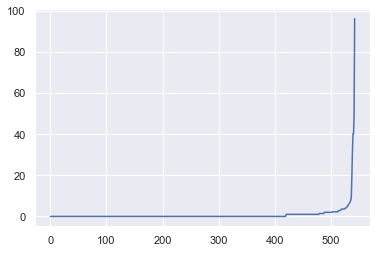

In [27]:
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)


In [28]:
m = DBSCAN(eps=10, min_samples=4)
m.fit(Z)


DBSCAN(eps=10, min_samples=4)

In [29]:
clusters = m.labels_


In [30]:
fig = px.scatter(Z, Z[:,1], Z[:,0], color=vectorizer(clusters), labels = {"x": "Month", "y": "Weather Delay (min)"}, title = "LAX")
fig.update_layout(showlegend=False)
fig.update_layout(
    autosize=False,
    width=1000,
    height=1000,
    margin=dict(
        l=50,
        r=50,
        b=100,
        t=100,
        pad=4
    ),
)

fig.show()



In [31]:
no_clusters = len(np.unique(clusters) )
no_noise = np.sum(np.array(clusters) == -1, axis=0)

print('Estimated no. of clusters: %d' % no_clusters)
print('Estimated no. of noise points: %d' % no_noise)

Estimated no. of clusters: 4
Estimated no. of noise points: 24


### DFW

In [32]:
test_dfw = origin_DFW.loc[origin_DFW['year']==2018].copy() #.sample(frac = 0.30)

A = test_dfw.iloc[:,[1,3]].values
A.shape


(9671, 2)

In [33]:
neigh = NearestNeighbors(n_neighbors=2)
nbrs = neigh.fit(A)
distances, indices = nbrs.kneighbors(A)


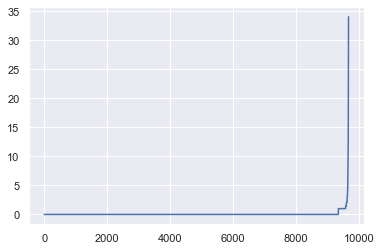

In [34]:
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)


In [47]:
m = DBSCAN(eps=3, min_samples=4)
m.fit(A)


DBSCAN(eps=3, min_samples=4)

In [48]:
clusters = m.labels_


In [49]:
fig = px.scatter(A, A[:,1], A[:,0], color=vectorizer(clusters), labels = {"x": "Month", "y": "Weather Delay (min)"}, title = "DFW")
fig.update_layout(showlegend=False)
fig.update_layout(
    autosize=False,
    width=1000,
    height=1000,
    margin=dict(
        l=50,
        r=50,
        b=100,
        t=100,
        pad=4
    ),
)

fig.show()


In [50]:
no_clusters = len(np.unique(clusters) )
no_noise = np.sum(np.array(clusters) == -1, axis=0)

print('Estimated no. of clusters: %d' % no_clusters)
print('Estimated no. of noise points: %d' % no_noise)


Estimated no. of clusters: 15
Estimated no. of noise points: 118


### ATL

In [51]:
test_atl = origin_ATL.loc[origin_ATL['year']==2018].copy() #.sample(frac = 0.30)

B = test_ord.iloc[:,[1,3]].values
B.shape


(15547, 2)

In [52]:
neigh = NearestNeighbors(n_neighbors=2)
nbrs = neigh.fit(B)
distances, indices = nbrs.kneighbors(B)


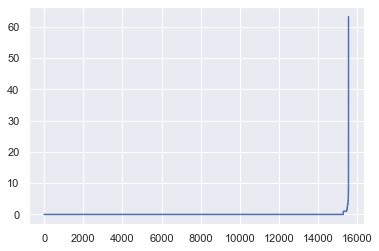

In [53]:
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)


In [54]:
m = DBSCAN(eps=5, min_samples=4)
m.fit(B)


DBSCAN(eps=5, min_samples=4)

In [55]:
clusters = m.labels_


In [56]:
fig = px.scatter(B, B[:,1], B[:,0], color=vectorizer(clusters), labels = {"x": "Month", "y": "Weather Delay (min)"}, title = "ATL")
fig.update_layout(showlegend=False)
fig.update_layout(
    autosize=False,
    width=1000,
    height=1000,
    margin=dict(
        l=50,
        r=50,
        b=100,
        t=100,
        pad=4
    ),
)

fig.show()


In [57]:
no_clusters = len(np.unique(clusters) )
no_noise = np.sum(np.array(clusters) == -1, axis=0)

print('Estimated no. of clusters: %d' % no_clusters)
print('Estimated no. of noise points: %d' % no_noise)

Estimated no. of clusters: 12
Estimated no. of noise points: 111


### Other way to plot

In [46]:
#ORD
#colors = ['forestgreen', 'maroon', 'royalblue', 'mediumorchid', 'tan', 'deeppink', 'olive', 'goldenrod', 'lightcyan', 'black']
#vectorizer = np.vectorize(lambda x: colors[x % len(colors)])
#plt.figure(figsize=(20, 12), dpi=80)
#plt.scatter(X[:,0],X[:,1], c=vectorizer(clusters))
#plt.title("ORD", fontsize = 30)
#plt.xlabel("Weather Delay", fontsize = 20)
#plt.ylabel("Months", fontsize = 20)
#plt.show()


#DEN
#colors = ['forestgreen', 'maroon', 'royalblue', 'mediumorchid', 'tan', 'deeppink', 'olive', 'goldenrod', 'lightcyan', 'black']
#vectorizer = np.vectorize(lambda x: colors[x % len(colors)])
#plt.figure(figsize=(20, 12), dpi=80)
#plt.scatter(Y[:,0],Y[:,1], c=vectorizer(clusters))
#plt.title("DEN", fontsize = 30)
#plt.xlabel("Weather Delay", fontsize = 20)
#plt.ylabel("Months", fontsize = 20)
#plt.show()

#LAX
#colors = ['forestgreen', 'maroon', 'royalblue', 'mediumorchid', 'tan', 'deeppink', 'olive', 'goldenrod', 'lightcyan', 'black']
#vectorizer = np.vectorize(lambda x: colors[x % len(colors)])
#plt.figure(figsize=(20, 12), dpi=80)
#plt.scatter(Z[:,0],Z[:,1], c=vectorizer(clusters))
#plt.title("LAX", fontsize = 30)
#plt.xlabel("Weather Delay", fontsize = 20)
#plt.ylabel("Months", fontsize = 20)
#plt.show()

#DFW
#colors = ['forestgreen', 'maroon', 'royalblue', 'mediumorchid', 'tan', 'deeppink', 'olive', 'goldenrod', 'lightcyan', 'black']
#vectorizer = np.vectorize(lambda x: colors[x % len(colors)])
#plt.figure(figsize=(20, 12), dpi=80)
#plt.scatter(A[:,0],A[:,1], c=vectorizer(clusters))
#plt.title("DFW", fontsize = 30)
#plt.xlabel("Weather Delay", fontsize = 20)
#plt.ylabel("Months", fontsize = 20)
#plt.show()


#ATL
#colors = ['forestgreen', 'maroon', 'royalblue', 'mediumorchid', 'tan', 'deeppink', 'olive', 'goldenrod', 'lightcyan', 'black']
#vectorizer = np.vectorize(lambda x: colors[x % len(colors)])
#plt.figure(figsize=(20, 12), dpi=80)
#plt.scatter(B[:,0],B[:,1], c=vectorizer(clusters))
#plt.title("ATL", fontsize = 30)
#plt.xlabel("Weather Delay", fontsize = 20)
#plt.ylabel("Months", fontsize = 20)
#plt.show()